In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"nikithaprincy","key":"7e90162ab32db6e61baec9e3ffbd6676"}'}

In [ ]:
!mkdir ~/.kaggle/

In [ ]:
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

 98% 793M/812M [00:04<00:00, 101MB/s] 
100% 812M/812M [00:04<00:00, 176MB/s]


In [ ]:
!unzip -qq dogs-vs-cats.zip

In [ ]:
!unzip -qq train.zip

#1. Consider The Cats & Dogs example. Start initially with a training sample of 1000, a validation sample of 500, and a test sample of 500.

Copying images to training,validation and test set.

In [ ]:
import shutil
from pathlib import Path

original_dir = Path("train")
new_base_dir = Path("cats_vs_dogs_data_1")

def create_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir_path = new_base_dir / subset_name / category
        dir_path.mkdir(parents=True, exist_ok=True)  # Create directory if it doesn't exist
        fileNames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fileName in fileNames:
            shutil.copyfile(src=original_dir / fileName,
                            dst=dir_path / fileName)

create_subset("train", start_index=0, end_index=1000)
create_subset("validation", start_index=1000, end_index=1500)
create_subset("test", start_index=1500, end_index=2000)


Using convulational neural network.

In [ ]:
import tensorflow as tf

inputs = tf.keras.Input(shape=(180, 180, 3))
preprocessed_inputs = tf.keras.layers.Rescaling(1./255)(inputs)
conv_features = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(preprocessed_inputs)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.Flatten()(conv_features)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(conv_features)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_5 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                      

Configures the model to use binary cross-entropy as the loss function, RMSprop as the optimizer, and accuracy as the evaluation metric

In [ ]:
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

It can be observed that,model might overfit,thus,we use regularization technique in the stage of DATA PREPROCESSING.

creates three datasets: train_image_dataset, validation_image_dataset, and test_image_dataset

In [ ]:

train_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


callback can be used to save the model's weights after every epoch or to stop training early if the model is not improving. Additionally, callbacks can be used to log metrics, visualize the model's performance, or schedule learning rate changes.

In [ ]:

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="best_model_convnet_from_scratch_1.keras",
        save_best_only=True,
        monitor="val_loss")
]

history = model.fit(
    train_image_dataset,
    epochs=10,
    validation_data=validation_image_dataset,
    callbacks=callbacks)

Epoch 1/10
63/63 [==============================] - 13s 105ms/step - loss: 0.7040 - accuracy: 0.5035 - val_loss: 0.6912 - val_accuracy: 0.5850
Epoch 2/10
63/63 [==============================] - 4s 64ms/step - loss: 0.6951 - accuracy: 0.5270 - val_loss: 0.6890 - val_accuracy: 0.5090
Epoch 3/10
63/63 [==============================] - 7s 104ms/step - loss: 0.7013 - accuracy: 0.5740 - val_loss: 0.7068 - val_accuracy: 0.5040
Epoch 4/10
63/63 [==============================] - 4s 62ms/step - loss: 0.6748 - accuracy: 0.5970 - val_loss: 0.6277 - val_accuracy: 0.6590
Epoch 5/10
63/63 [==============================] - 6s 87ms/step - loss: 0.6218 - accuracy: 0.6425 - val_loss: 0.6710 - val_accuracy: 0.6020
Epoch 6/10
63/63 [==============================] - 6s 90ms/step - loss: 0.5886 - accuracy: 0.6910 - val_loss: 0.6093 - val_accuracy: 0.6540
Epoch 7/10
63/63 [==============================] - 4s 62ms/step - loss: 0.5543 - accuracy: 0.7220 - val_loss: 0.5850 - val_accuracy: 0.7040
Epoch 8/10

load the saved model and evaluate its performance on the test dataset:

In [ ]:

test_model = tf.keras.models.load_model("best_model_convnet_from_scratch_1.keras")
test_loss, test_acc = test_model.evaluate(test_image_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 63ms/step - loss: 0.5546 - accuracy: 0.7240
Test accuracy: 0.724


Accuracy=79.3%
Validation Accuracy=73.3%
Test Accuracy=72.4%

plot the training and validation accuracy, as well as the training and validation loss, over epochs using Matplotlib.

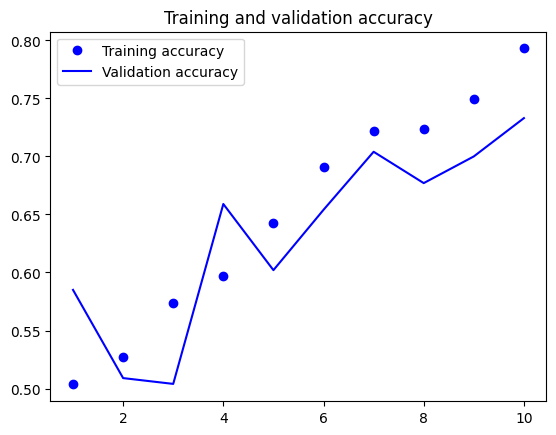

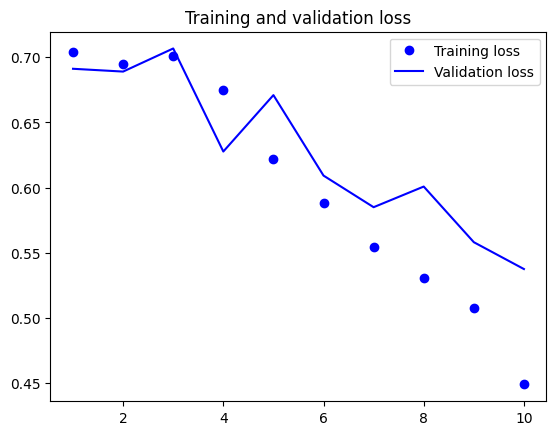

In [ ]:

import matplotlib.pyplot as plt
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

#Data Augmentation

Data augmentation is a technique that generates new and modified versions of the original data to increase the size of a training set. This helps reduce overfitting and improve the model's generalization ability.

In [ ]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2)
])

inputs = tf.keras.Input(shape=(180, 180, 3))
input = data_augmentation(inputs)
preprocessed_inputs = tf.keras.layers.Rescaling(1./255)(input)
conv_features = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(preprocessed_inputs)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.Flatten()(conv_features)
conv_features = tf.keras.layers.Dropout(0.5)(conv_features)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(conv_features)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_1.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_image_dataset,
    epochs=10,
    validation_data=validation_image_dataset,
    callbacks=callbacks)


Epoch 1/10
63/63 [==============================] - 9s 68ms/step - loss: 0.6981 - accuracy: 0.5005 - val_loss: 0.6925 - val_accuracy: 0.5030
Epoch 2/10
63/63 [==============================] - 4s 65ms/step - loss: 0.6958 - accuracy: 0.5070 - val_loss: 0.6908 - val_accuracy: 0.5810
Epoch 3/10
63/63 [==============================] - 7s 109ms/step - loss: 0.6903 - accuracy: 0.5455 - val_loss: 0.7051 - val_accuracy: 0.5000
Epoch 4/10
63/63 [==============================] - 4s 65ms/step - loss: 0.6835 - accuracy: 0.5610 - val_loss: 0.6640 - val_accuracy: 0.6230
Epoch 5/10
63/63 [==============================] - 5s 77ms/step - loss: 0.6614 - accuracy: 0.6260 - val_loss: 0.6362 - val_accuracy: 0.6510
Epoch 6/10
63/63 [==============================] - 7s 105ms/step - loss: 0.6327 - accuracy: 0.6545 - val_loss: 0.6609 - val_accuracy: 0.6270
Epoch 7/10
63/63 [==============================] - 6s 90ms/step - loss: 0.6363 - accuracy: 0.6500 - val_loss: 0.5989 - val_accuracy: 0.6640
Epoch 8/10


data augmentation to the model did not bring any better results,but yet can be checked by increasing the training sample size and trying on data augmentation on it.

Accuracy=67.7%
Validation Accuracy=65.2%
Test Accuracy=72.5%

In [ ]:

test_model = tf.keras.models.load_model(
    "convnet_from_scratch_with_augmentation_1.keras")
test_loss, test_acc = test_model.evaluate(test_image_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 57ms/step - loss: 0.6189 - accuracy: 0.6510
Test accuracy: 0.651


test accuracy was not improved

#2)Increase training sample size.

Attempted to increase training sample size from 1000 to 1500.

In [ ]:

import shutil
from pathlib import Path

original_dir = Path("train")
new_base_dir = Path("cats_vs_dogs_data_2")

def create_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir_path = new_base_dir / subset_name / category
        dir_path.mkdir(parents=True, exist_ok=True)  # Create directory if it doesn't exist
        fileNames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fileName in fileNames:
            shutil.copyfile(src=original_dir / fileName,
                            dst=dir_path / fileName)

create_subset("train", start_index=0, end_index=1500)
create_subset("validation", start_index=1500, end_index=2000)
create_subset("test", start_index=2000, end_index=2500)

In [ ]:

train_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
inputs = tf.keras.Input(shape=(180, 180, 3))
preprocessed_inputs = tf.keras.layers.Rescaling(1./255)(inputs)
conv_features = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(preprocessed_inputs)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.Flatten()(conv_features)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(conv_features)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_image_dataset,
    epochs=10,
    validation_data=validation_image_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 7s 60ms/step - loss: 0.6921 - accuracy: 0.5343 - val_loss: 0.6786 - val_accuracy: 0.5600
Epoch 2/10
94/94 [==============================] - 9s 92ms/step - loss: 0.6652 - accuracy: 0.6110 - val_loss: 0.6443 - val_accuracy: 0.6470
Epoch 3/10
94/94 [==============================] - 6s 56ms/step - loss: 0.6177 - accuracy: 0.6670 - val_loss: 0.5994 - val_accuracy: 0.6820
Epoch 4/10
94/94 [==============================] - 6s 65ms/step - loss: 0.5542 - accuracy: 0.7137 - val_loss: 0.5909 - val_accuracy: 0.6960
Epoch 5/10
94/94 [==============================] - 8s 84ms/step - loss: 0.5326 - accuracy: 0.7283 - val_loss: 0.6090 - val_accuracy: 0.6690
Epoch 6/10
94/94 [==============================] - 6s 56ms/step - loss: 0.4910 - accuracy: 0.7643 - val_loss: 0.6081 - val_accuracy: 0.6880
Epoch 7/10
94/94 [==============================] - 8s 82ms/step - loss: 0.4519 - accuracy: 0.7903 - val_loss: 0.5328 - val_accuracy: 0.7440
Epoch 8/10
94

In [ ]:
test_model = tf.keras.models.load_model(
    "convnet_from_scratch2.keras")
test_loss, test_acc = test_model.evaluate(test_image_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 32ms/step - loss: 0.4939 - accuracy: 0.7760
Test accuracy: 0.776


Accuracy=86.8%
Validation Accuracy=72.6%
Test Accuracy=77.6%

##using data augmentation

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

inputs = tf.keras.Input(shape=(180, 180, 3))
input = data_augmentation(inputs)
preprocessed_inputs = tf.keras.layers.Rescaling(1./255)(input)
conv_features = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(preprocessed_inputs)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.Flatten()(conv_features)
conv_features = tf.keras.layers.Dropout(0.5)(conv_features)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(conv_features)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_2.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_image_dataset,
    epochs=10,
    validation_data=validation_image_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 9s 60ms/step - loss: 0.6946 - accuracy: 0.5010 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 2/10
94/94 [==============================] - 9s 89ms/step - loss: 0.6936 - accuracy: 0.4843 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/10
94/94 [==============================] - 6s 57ms/step - loss: 0.6933 - accuracy: 0.4967 - val_loss: 0.6931 - val_accuracy: 0.4870
Epoch 4/10
94/94 [==============================] - 6s 56ms/step - loss: 0.6937 - accuracy: 0.5017 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/10
94/94 [==============================] - 9s 91ms/step - loss: 0.6933 - accuracy: 0.4887 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 6/10
94/94 [==============================] - 6s 57ms/step - loss: 0.6932 - accuracy: 0.4917 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 7/10
94/94 [==============================] - 9s 85ms/step - loss: 0.6932 - accuracy: 0.4923 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 8/10
94

In [ ]:

test_model = tf.keras.models.load_model(
    "convnet_from_scratch_with_augmentation_2.keras")
test_loss, test_acc = test_model.evaluate(test_image_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 1s 30ms/step - loss: 0.6925 - accuracy: 0.5000
Test accuracy: 0.500


Accuracy=49.6%
Validation Accuracy=50.6%
Test Accuracy=50.6%

#3. Finding the ideal training sample size

We set the training, validation, and test set sizes, respectively, to 1500, 1000, and 500.

In [ ]:

import shutil
from pathlib import Path

original_dir = Path("train")
new_base_dir = Path("cats_vs_dogs_data_3")

def create_subset(subset_name, start_index, end_index):
    for category in ("cat", "dog"):
        dir_path = new_base_dir / subset_name / category
        dir_path.mkdir(parents=True, exist_ok=True)  # Create directory if it doesn't exist
        fileNames = [f"{category}.{i}.jpg" for i in range(start_index, end_index)]
        for fileName in fileNames:
            shutil.copyfile(src=original_dir / fileName,
                            dst=dir_path / fileName)

create_subset("train", start_index=0, end_index=1500)
create_subset("validation", start_index=1500, end_index=2500)
create_subset("test", start_index=2500, end_index=3000)

In [ ]:
train_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "train",
    image_size=(180, 180),
    batch_size=32)
validation_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "validation",
    image_size=(180, 180),
    batch_size=32)
test_image_dataset = tf.keras.utils.image_dataset_from_directory(
    directory=new_base_dir / "test",
    image_size=(180, 180),
    batch_size=32)

Found 3000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [ ]:
inputs = tf.keras.Input(shape=(180, 180, 3))
inputs = tf.keras.Input(shape=(180, 180, 3))
preprocessed_inputs = tf.keras.layers.Rescaling(1./255)(inputs)
conv_features = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(preprocessed_inputs)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.Flatten()(conv_features)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(conv_features)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])


In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_image_dataset,
    epochs=10,
    validation_data=validation_image_dataset,
    callbacks=callbacks)

Epoch 1/10
94/94 [==============================] - 12s 108ms/step - loss: 0.7011 - accuracy: 0.5137 - val_loss: 0.6888 - val_accuracy: 0.6455
Epoch 2/10
94/94 [==============================] - 10s 105ms/step - loss: 0.6802 - accuracy: 0.5800 - val_loss: 0.6542 - val_accuracy: 0.6140
Epoch 3/10
94/94 [==============================] - 7s 69ms/step - loss: 0.6341 - accuracy: 0.6420 - val_loss: 0.6135 - val_accuracy: 0.6605
Epoch 4/10
94/94 [==============================] - 11s 110ms/step - loss: 0.5984 - accuracy: 0.6847 - val_loss: 1.6557 - val_accuracy: 0.5180
Epoch 5/10
94/94 [==============================] - 7s 68ms/step - loss: 0.5664 - accuracy: 0.7177 - val_loss: 0.5869 - val_accuracy: 0.6905
Epoch 6/10
94/94 [==============================] - 10s 99ms/step - loss: 0.5189 - accuracy: 0.7510 - val_loss: 0.5418 - val_accuracy: 0.7355
Epoch 7/10
94/94 [==============================] - 7s 70ms/step - loss: 0.4847 - accuracy: 0.7643 - val_loss: 0.6541 - val_accuracy: 0.6895
Epoch 

In [ ]:

test_model = tf.keras.models.load_model(
    "convnet_from_scratch3.keras")
test_loss, test_acc = test_model.evaluate(test_image_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 2s 34ms/step - loss: 0.5570 - accuracy: 0.7190
Test accuracy: 0.719


Accuracy=84.7%
Validation Accuracy=73.6%
Test Accuracy=71.9%

##Using Data augmentation

In [ ]:

data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

In [ ]:

inputs = tf.keras.Input(shape=(180, 180, 3))
input = data_augmentation(inputs)
preprocessed_inputs = tf.keras.layers.Rescaling(1./255)(input)
conv_features = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(preprocessed_inputs)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.MaxPooling2D(pool_size=2)(conv_features)
conv_features = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(conv_features)
conv_features = tf.keras.layers.Flatten()(conv_features)
conv_features = tf.keras.layers.Dropout(0.5)(conv_features)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(conv_features)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="convnet_from_scratch_with_augmentation_3.keras",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_image_dataset,
    epochs=10,
    validation_data=validation_image_dataset,
    callbacks=callbacks)


Epoch 1/10
94/94 [==============================] - 14s 109ms/step - loss: 0.6920 - accuracy: 0.5157 - val_loss: 0.6843 - val_accuracy: 0.5215
Epoch 2/10
94/94 [==============================] - 7s 70ms/step - loss: 0.6931 - accuracy: 0.5153 - val_loss: 0.6897 - val_accuracy: 0.5445
Epoch 3/10
94/94 [==============================] - 10s 99ms/step - loss: 0.6821 - accuracy: 0.5473 - val_loss: 0.6836 - val_accuracy: 0.5345
Epoch 4/10
94/94 [==============================] - 10s 101ms/step - loss: 0.6652 - accuracy: 0.6047 - val_loss: 0.7099 - val_accuracy: 0.5810
Epoch 5/10
94/94 [==============================] - 8s 79ms/step - loss: 0.6448 - accuracy: 0.6153 - val_loss: 0.6715 - val_accuracy: 0.6195
Epoch 6/10
94/94 [==============================] - 10s 107ms/step - loss: 0.6300 - accuracy: 0.6393 - val_loss: 0.6327 - val_accuracy: 0.6390
Epoch 7/10
94/94 [==============================] - 7s 69ms/step - loss: 0.6154 - accuracy: 0.6643 - val_loss: 0.5956 - val_accuracy: 0.6890
Epoch 

In [ ]:
test_model = tf.keras.models.load_model(
    "convnet_from_scratch_with_augmentation_3.keras")
test_loss, test_acc = test_model.evaluate(test_image_dataset)
print(f"Test accuracy: {test_acc:.3f}")



32/32 [==============================] - 2s 30ms/step - loss: 0.6176 - accuracy: 0.6620
Test accuracy: 0.662


Accuracy=69.1%
Validation Accuracy=69.5%
Test Accuracy=66.2%

#4.Using a pre-trained network

Feature extraction - Instantiating the VGG16 convolutional base

In [ ]:
conv_base = tf.keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(180, 180, 3))
conv_base.summary()

58889256/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                              

Feature extraction - Extracting features and corresponding labels

In [ ]:

import numpy as np

def get_features_and_labels(dataset):
    all_features = []
    all_labels = []
    for images, labels in dataset:
        preprocessed_images = tf.keras.applications.vgg16.preprocess_input(images)
        features = conv_base.predict(preprocessed_images)
        all_features.append(features)
        all_labels.append(labels)
    return np.concatenate(all_features), np.concatenate(all_labels)

train_features, train_labels =  get_features_and_labels(train_image_dataset)
val_features, val_labels =  get_features_and_labels(validation_image_dataset)
test_features, test_labels =  get_features_and_labels(test_image_dataset)

train_features.shape

1/1 [==============================] - 2s 2s/step


(3000, 5, 5, 512)

Feature extraction - Defining and training the densely connected classifier

In [ ]:
inputs = tf.keras.Input(shape=(5, 5, 512))
x = tf.keras.layers.Flatten()(inputs)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
      filepath="feature_extractionPT1.keras",
      save_best_only=True,
      monitor="val_loss")
]
history = model.fit(
    train_features, train_labels,
    epochs=15,
    validation_data=(val_features, val_labels),
    callbacks=callbacks)

Epoch 1/15
94/94 [==============================] - 3s 18ms/step - loss: 11.9299 - accuracy: 0.9340 - val_loss: 4.0927 - val_accuracy: 0.9720
Epoch 2/15
94/94 [==============================] - 1s 10ms/step - loss: 3.7496 - accuracy: 0.9773 - val_loss: 6.1697 - val_accuracy: 0.9675
Epoch 3/15
94/94 [==============================] - 1s 13ms/step - loss: 2.1446 - accuracy: 0.9860 - val_loss: 4.5801 - val_accuracy: 0.9780
Epoch 4/15
94/94 [==============================] - 2s 16ms/step - loss: 0.8541 - accuracy: 0.9903 - val_loss: 7.4099 - val_accuracy: 0.9705
Epoch 5/15
94/94 [==============================] - 1s 7ms/step - loss: 0.3417 - accuracy: 0.9963 - val_loss: 6.7230 - val_accuracy: 0.9720
Epoch 6/15
94/94 [==============================] - 1s 8ms/step - loss: 0.9988 - accuracy: 0.9937 - val_loss: 9.5079 - val_accuracy: 0.9680
Epoch 7/15
94/94 [==============================] - 1s 6ms/step - loss: 0.8402 - accuracy: 0.9943 - val_loss: 6.0380 - val_accuracy: 0.9695
Epoch 8/15
94/9

Accuracy=99.8%
Validation Accuracy =97.3%

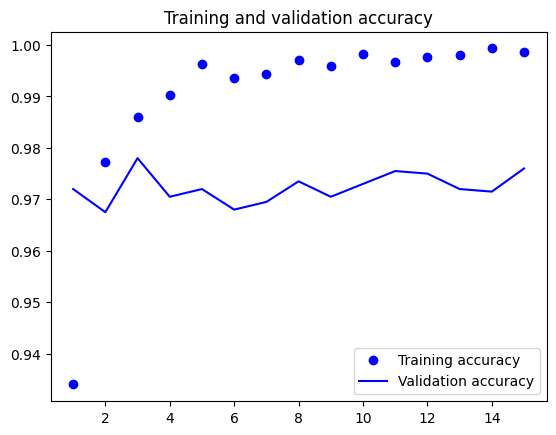

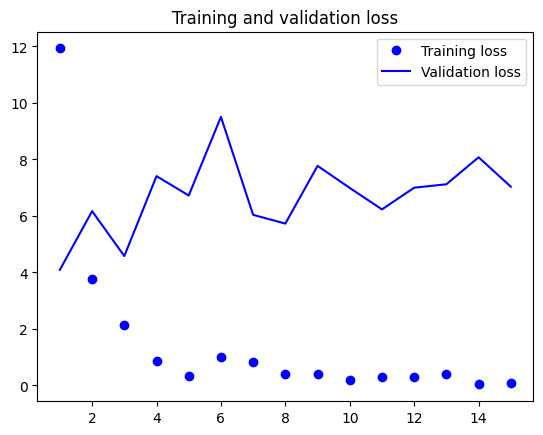

In [ ]:

import matplotlib.pyplot as plt
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [ ]:
conv_base  = tf.keras.applications.vgg16.VGG16(
    weights="imagenet",
    include_top=False)
conv_base.trainable = False


conv_base.trainable = True
print("This is the number of trainable weights "
      "before freezing the conv base:", len(conv_base.trainable_weights))


conv_base.trainable = False
print("This is the number of trainable weights "
      "after freezing the conv base:", len(conv_base.trainable_weights))


This is the number of trainable weights before freezing the conv base: 26
This is the number of trainable weights after freezing the conv base: 0


##Feature extraction with Data Augmentation

In [ ]:
data_augmentation = tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.1),
        tf.keras.layers.RandomZoom(0.2),
    ]
)

inputs = tf.keras.Input(shape=(180, 180, 3))
x = data_augmentation(inputs)
x = tf.keras.applications.vgg16.preprocess_input(x)
x = conv_base(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(256)(x)
x = tf.keras.layers.Dropout(0.5)(x)
outputs = tf.keras.layers.Dense(1, activation="sigmoid")(x)
model = tf.keras.Model(inputs, outputs)
model.compile(loss="binary_crossentropy",
              optimizer="rmsprop",
              metrics=["accuracy"])

In [ ]:

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath="feature_extraction_with_data_augmentationPT2.h5",
        save_best_only=True,
        monitor="val_loss")
]
history = model.fit(
    train_image_dataset,
    epochs=5,
    validation_data=validation_image_dataset,
    callbacks=callbacks)

Epoch 1/5
94/94 [==============================] - 17s 161ms/step - loss: 13.3714 - accuracy: 0.9097 - val_loss: 6.0543 - val_accuracy: 0.9640
Epoch 2/5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


94/94 [==============================] - 16s 163ms/step - loss: 7.1210 - accuracy: 0.9470 - val_loss: 5.8420 - val_accuracy: 0.9670
Epoch 3/5
94/94 [==============================] - 16s 172ms/step - loss: 5.0767 - accuracy: 0.9587 - val_loss: 3.8668 - val_accuracy: 0.9735
Epoch 4/5
94/94 [==============================] - 16s 164ms/step - loss: 5.1684 - accuracy: 0.9570 - val_loss: 3.9363 - val_accuracy: 0.9750
Epoch 5/5
94/94 [==============================] - 16s 166ms/step - loss: 4.6471 - accuracy: 0.9563 - val_loss: 2.9224 - val_accuracy: 0.9770


In [ ]:

test_model = tf.keras.models.load_model(
    "feature_extraction_with_data_augmentationPT2.h5")
test_loss, test_acc = test_model.evaluate(test_image_dataset)
print(f"Test accuracy: {test_acc:.3f}")

32/32 [==============================] - 3s 92ms/step - loss: 5.0016 - accuracy: 0.9580
Test accuracy: 0.958


Accuracy=95.6%
Validation Accuracy=97.7%
Test Accuracy=95.8%